<a href="https://colab.research.google.com/github/hq43et28ms9z/Project/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%BF%D0%BE_%D0%90%D0%B8%D0%9F%D0%A0%D0%A0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт нужных модулей

In [51]:
import numpy as np
import pandas as pd
import math as mth
import scipy as scp
import matplotlib.pyplot as plt
import statsmodels.api as sm

Установка пакета ARCH

In [52]:
!pip install git+https://github.com/bashtage/arch.git

  Cloning https://github.com/bashtage/arch.git to /tmp/pip-req-build-ou59nw49
  Running command git clone -q https://github.com/bashtage/arch.git /tmp/pip-req-build-ou59nw49
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


Файл с данными индекса HSI был загружен вручную

In [53]:
Hang_Seng = pd.read_csv("HSI.csv")
Hang_Seng

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.000000e+00
1,1987-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.000000e+00
3,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.000000e+00
4,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.000000e+00
...,...,...,...,...,...,...,...
8937,2022-03-03,22434.259766,22543.419922,22378.109375,22467.339844,22467.339844,1.937725e+09
8938,2022-03-04,21879.130859,22017.939453,21838.990234,21905.289063,21905.289063,2.438205e+09
8939,2022-03-07,21308.900391,21327.189453,20826.359375,21057.630859,21057.630859,3.322870e+09
8940,2022-03-08,21082.390625,21303.519531,20638.949219,20765.869141,20765.869141,3.231990e+09


In [54]:
Hang_Seng=Hang_Seng.drop(columns=["Volume"])
Hang_Seng = Hang_Seng.dropna().reset_index(drop=True)
Hang_Seng

,Date,Open,High,Low,Close,Adj Close
0,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049
1,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098
2,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902
3,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902
4,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098
...,...,...,...,...,...,...
8685,2022-03-03,22434.259766,22543.419922,22378.109375,22467.339844,22467.339844
8686,2022-03-04,21879.130859,22017.939453,21838.990234,21905.289063,21905.289063
8687,2022-03-07,21308.900391,21327.189453,20826.359375,21057.630859,21057.630859
8688,2022-03-08,21082.390625,21303.519531,20638.949219,20765.869141,20765.869141


In [56]:
for i in range(1,len(Hang_Seng)):
  Hang_Seng["Доходность"][i]=((Hang_Seng["Close"][i]-Hang_Seng["Close"][i-1])/(Hang_Seng["Close"][i-1]))
for i in range(1,len(Hang_Seng)):
  Hang_Seng["Yt"][i]=np.log1p(Hang_Seng["Close"][i]/Hang_Seng["Close"][i-1])
Hang_Seng

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date,Open,High,Low,Close,Adj Close,Доходность,Yt
0,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,-0.006653,0.689815
1,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,-0.010980,0.687642
2,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.004842,0.695565
3,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.012341,0.699299
4,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.008979,0.697627
...,...,...,...,...,...,...,...,...
8685,2022-03-03,22434.259766,22543.419922,22378.109375,22467.339844,22467.339844,0.005524,0.695905
8686,2022-03-04,21879.130859,22017.939453,21838.990234,21905.289063,21905.289063,-0.025016,0.680560
8687,2022-03-07,21308.900391,21327.189453,20826.359375,21057.630859,21057.630859,-0.038697,0.673609
8688,2022-03-08,21082.390625,21303.519531,20638.949219,20765.869141,20765.869141,-0.013855,0.686195


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a3acee350>,
      dtype=object)

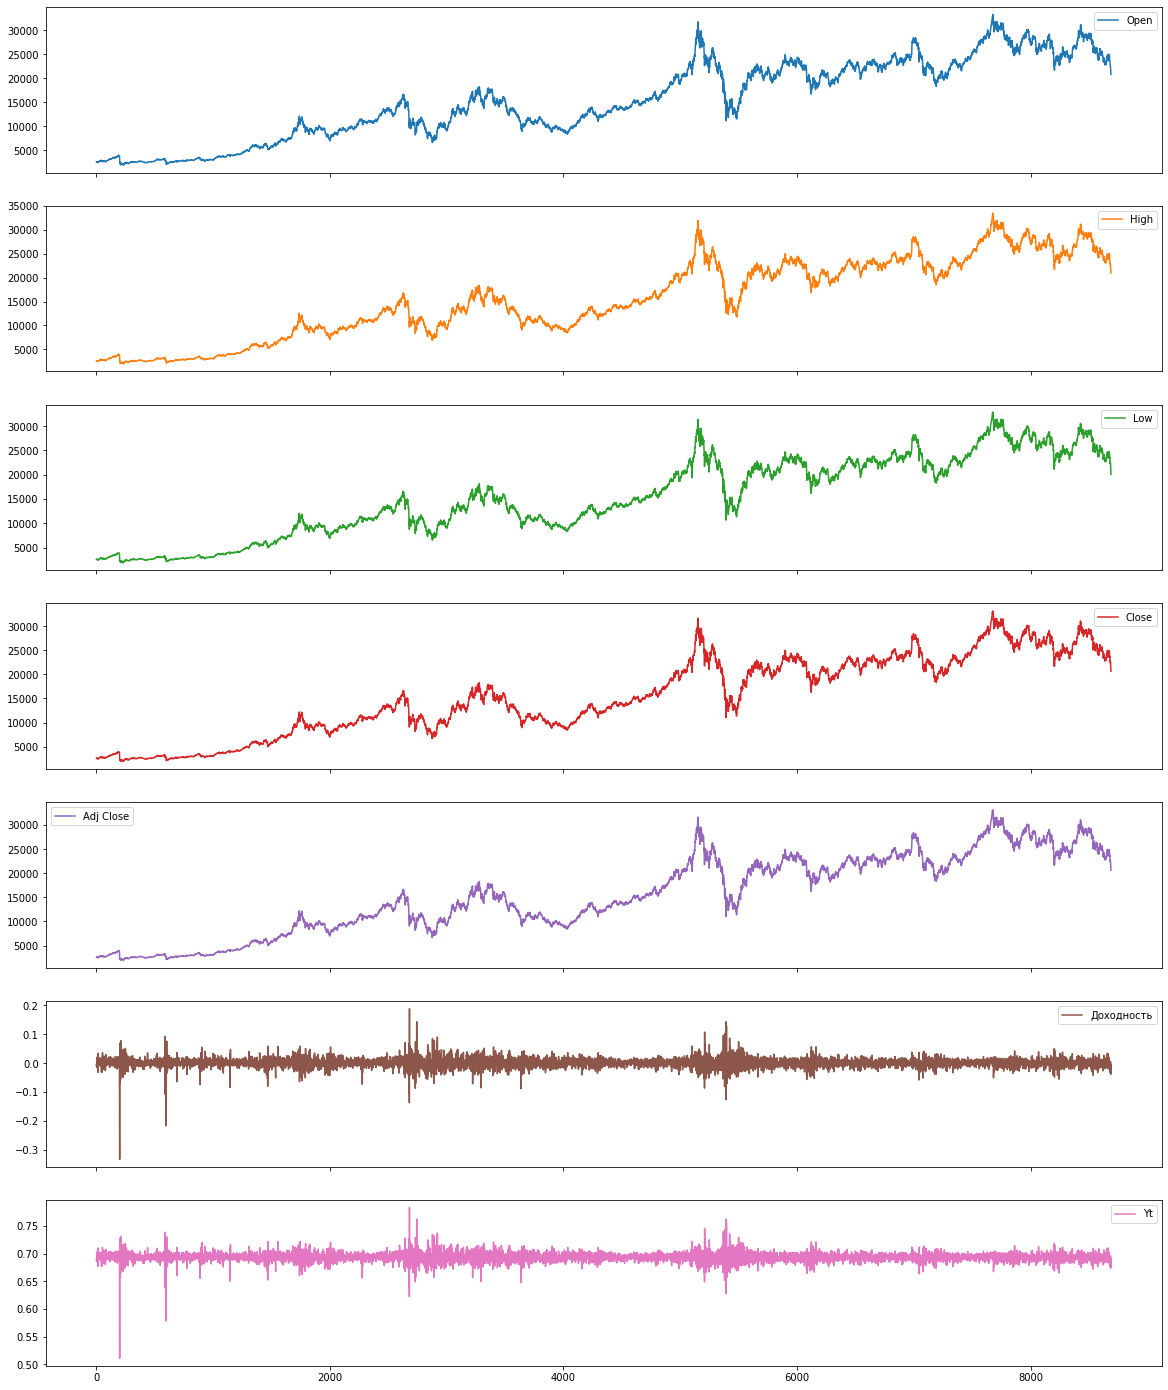

In [57]:
Hang_Seng.plot(subplots=True,figsize=(20,25))

Перевод доходности в % представлен ниже

In [58]:
Hang_Seng["Доходность"]=Hang_Seng["Доходность"]*100
Hang_Seng

,Date,Open,High,Low,Close,Adj Close,Доходность,Yt
0,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,-0.665314,0.689815
1,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,-1.098001,0.687642
2,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.484225,0.695565
3,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,1.234133,0.699299
4,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.897875,0.697627
...,...,...,...,...,...,...,...,...
8685,2022-03-03,22434.259766,22543.419922,22378.109375,22467.339844,22467.339844,0.552365,0.695905
8686,2022-03-04,21879.130859,22017.939453,21838.990234,21905.289063,21905.289063,-2.501635,0.680560
8687,2022-03-07,21308.900391,21327.189453,20826.359375,21057.630859,21057.630859,-3.869651,0.673609
8688,2022-03-08,21082.390625,21303.519531,20638.949219,20765.869141,20765.869141,-1.385539,0.686195


In [59]:
(Hang_Seng["Close"]==Hang_Seng["Adj Close"]).value_counts()

True    8690
dtype: int64

*Close price adjusted for splits. 

**Adjusted close price adjusted for splits and dividend and/or capital gain distributions.

Значения столбца "Close" и "Adj Close" на одну и ту же дату совпадают

In [60]:
Hang_Seng=Hang_Seng.drop(columns="Adj Close")
Hang_Seng

,Date,Open,High,Low,Close,Доходность,Yt
0,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,-0.665314,0.689815
1,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,-1.098001,0.687642
2,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,0.484225,0.695565
3,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,1.234133,0.699299
4,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,0.897875,0.697627
...,...,...,...,...,...,...,...
8685,2022-03-03,22434.259766,22543.419922,22378.109375,22467.339844,0.552365,0.695905
8686,2022-03-04,21879.130859,22017.939453,21838.990234,21905.289063,-2.501635,0.680560
8687,2022-03-07,21308.900391,21327.189453,20826.359375,21057.630859,-3.869651,0.673609
8688,2022-03-08,21082.390625,21303.519531,20638.949219,20765.869141,-1.385539,0.686195


Подсчёт скользящего среднего и СКО окна размером 10 для Continuously compounded returns

In [61]:
Hang_Seng["Moving Average Mean"] = Hang_Seng["Yt"].rolling(window=10).mean()
Hang_Seng["Moving Average STD"] = Hang_Seng["Yt"].rolling(window=10).std()
Hang_Seng

,Date,Open,High,Low,Close,Доходность,Yt,Moving Average Mean,Moving Average STD
0,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,-0.665314,0.689815,NaN,NaN
1,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,-1.098001,0.687642,NaN,NaN
2,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,0.484225,0.695565,NaN,NaN
3,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,1.234133,0.699299,NaN,NaN
4,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,0.897875,0.697627,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8685,2022-03-03,22434.259766,22543.419922,22378.109375,22467.339844,0.552365,0.695905,0.688256,0.006810
8686,2022-03-04,21879.130859,22017.939453,21838.990234,21905.289063,-2.501635,0.680560,0.687940,0.007110
8687,2022-03-07,21308.900391,21327.189453,20826.359375,21057.630859,-3.869651,0.673609,0.686310,0.008366
8688,2022-03-08,21082.390625,21303.519531,20638.949219,20765.869141,-1.385539,0.686195,0.686969,0.008033


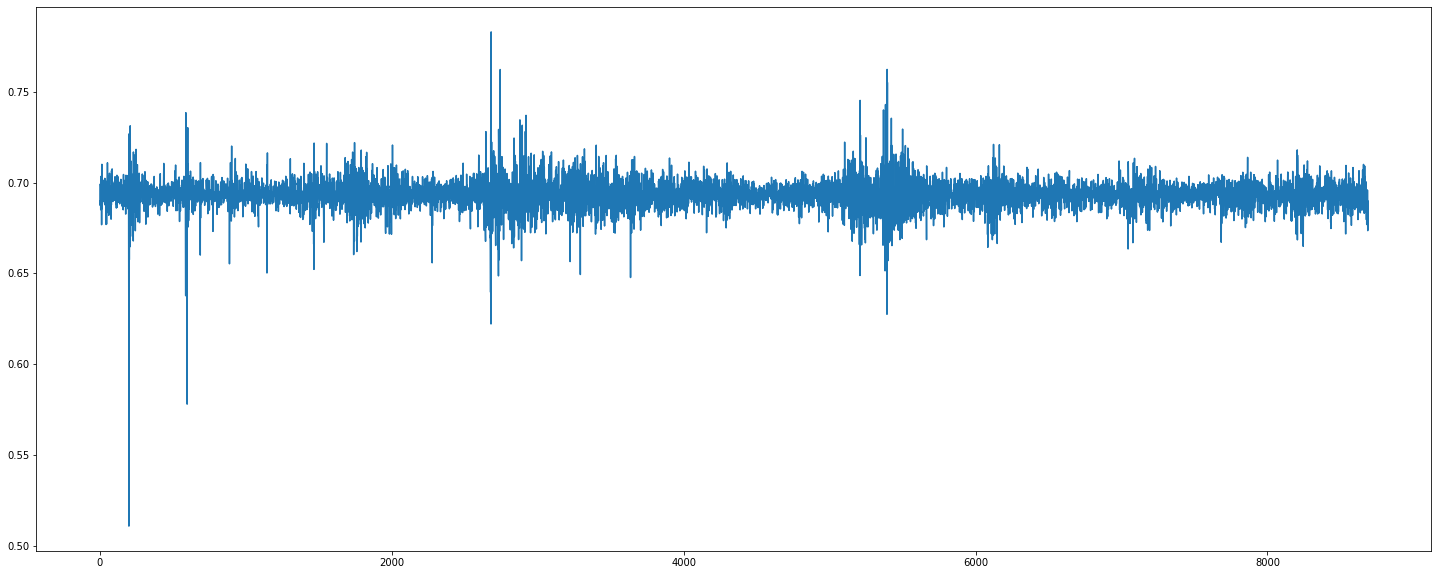

In [62]:
Hang_Seng["Yt"].plot(figsize=(25,10))

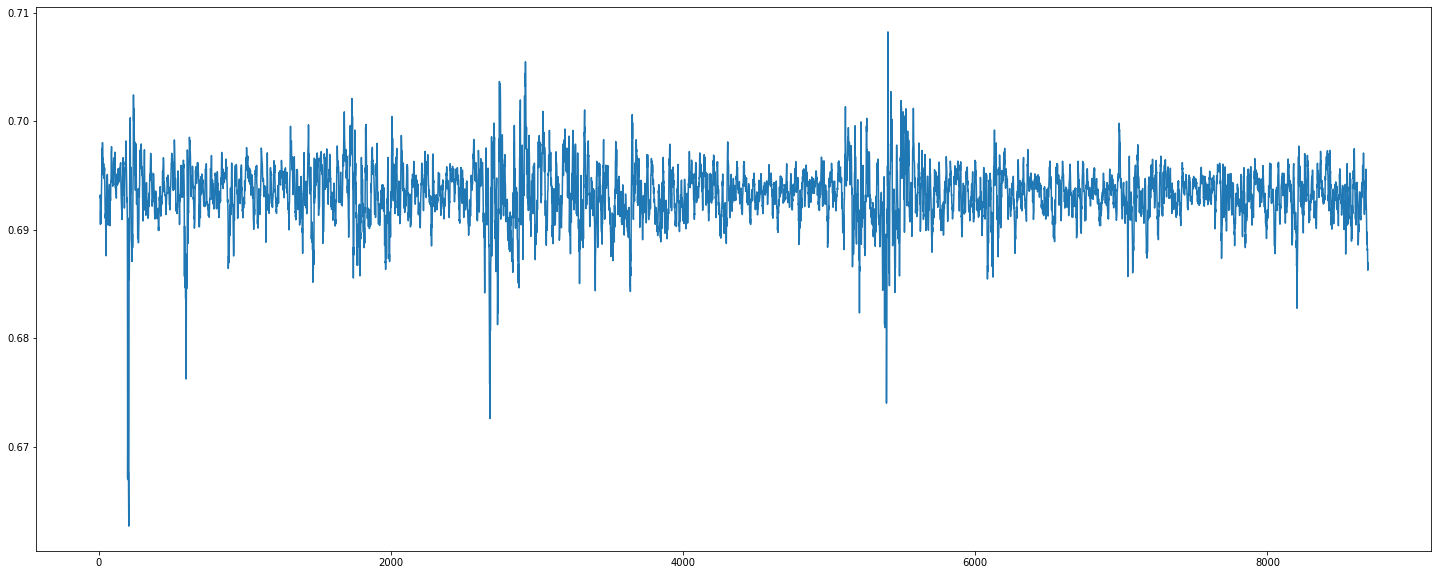

In [63]:
Hang_Seng["Moving Average Mean"].plot(figsize=(25,10))

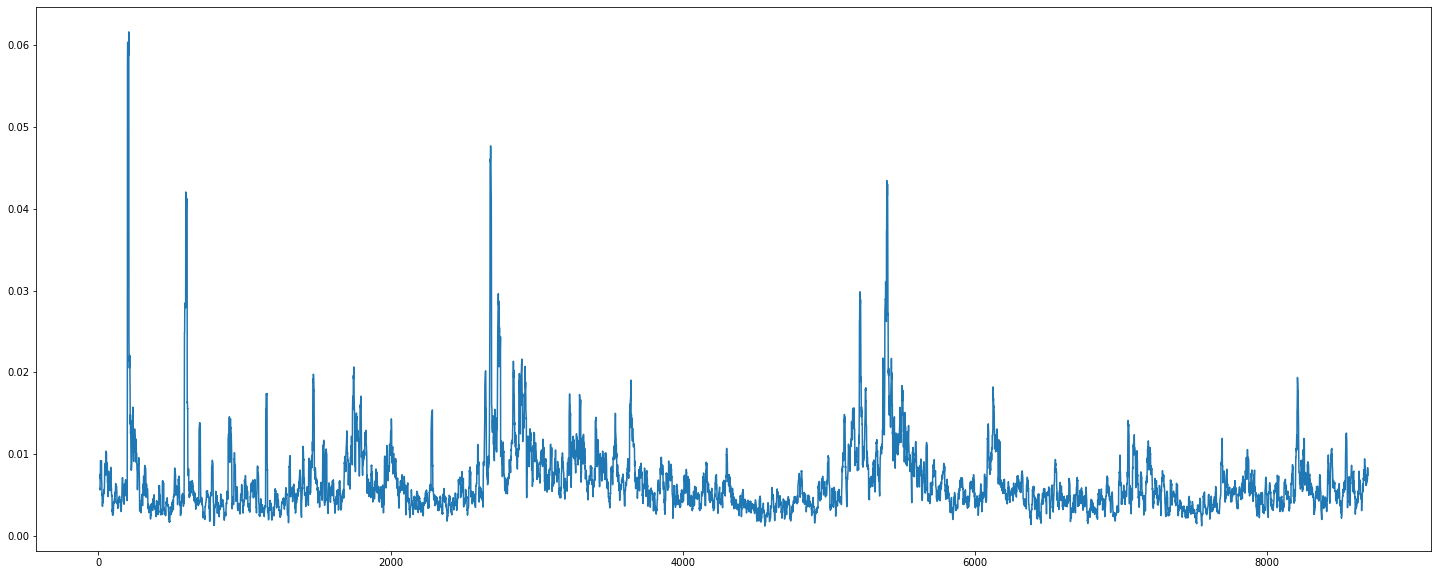

In [64]:
Hang_Seng["Moving Average STD"].plot(figsize=(25,10))

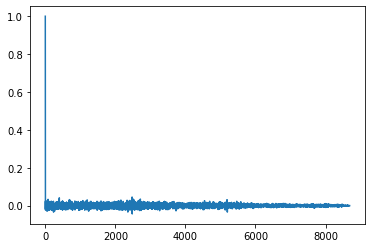

In [68]:
ACF = sm.tsa.acf(Hang_Seng["Yt"], nlags=len(Hang_Seng))
plt.plot(ACF,scalex=True)

In [69]:
?scp.stats.jarque_bera()

In [18]:
JB_test = scp.stats.jarque_bera(Hang_Seng["Yt"])
JB_test

(657139.0512812465, 0.0)

In [70]:
JB_test = scp.stats.jarque_bera(Hang_Seng["Close"])
JB_test

(489.15397182203276, 0.0)

Returns

jb_valuefloat;
The test statistic.

pfloat;
The p-value for the hypothesis test.

In [20]:
?sm.stats.diagnostic.acorr_ljungbox()

In [86]:
LB_test = sm.stats.diagnostic.acorr_ljungbox(Hang_Seng["Yt"],lags=21,auto_lag=True)
LB_test

,lb_stat,lb_pvalue
1,2.327340,0.127119
2,4.698166,0.095457
3,21.292473,0.000092
4,25.688927,0.000037
5,29.812777,0.000016
6,30.231304,0.000036
7,33.099357,0.000025
8,38.488891,0.000006
9,40.919961,0.000005
10,41.363847,0.000010


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a3a730790>,
      dtype=object)

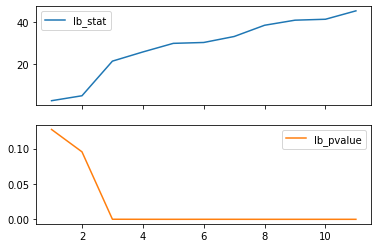

In [74]:
LB_test.plot(subplots=True)

Returns

lbvalue : float or array;
    test statistic

pvalue : float or array;
    p-value based on chi-square distribution

bpvalue : (optional), float or array;
    test statistic for Box-Pierce test

bppvalue : (optional), float or array;
    p-value based for Box-Pierce test on chi-square distribution


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 5.000e+00, 4.000e+00, 0.000e+00, 8.000e+00,
        2.000e+00, 3.000e+00, 1.200e+01, 2.400e+01, 1.700e+01, 5.400e+01,
        6.300e+01, 1.150e+02, 2.130e+02, 3.370e+02, 6.080e+02, 1.043e+03,
        1.705e+03, 1.785e+03, 1.110e+03, 7.010e+02, 4.010e+02, 2.080e+02,
        9.600e+01, 6.200e+01, 4.000e+01, 2.100e+01, 8.000e+00, 1.400e+01,
        3.000e+00, 5.000e+00, 3.000e+0

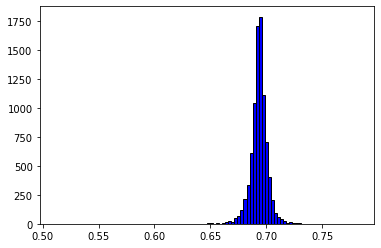

In [75]:
import seaborn as sns
plt.hist(Hang_Seng["Yt"], color = 'blue', edgecolor = 'black', bins = 100)

(array([  2.,   1.,   2.,   2.,   3.,   3.,   2.,   1.,   3.,   6.,   5.,
          7.,  12.,  11.,  14.,  23.,  27.,  42.,  44.,  49.,  51.,  56.,
         62.,  99., 109.,  92., 123., 143., 159., 154., 180., 185., 232.,
        193., 222., 267., 228., 269., 258., 277., 300., 288., 260., 282.,
        288., 285., 280., 271., 215., 248., 252., 231., 227., 177., 184.,
        151., 158., 147., 110.,  93.,  88.,  87.,  76.,  65.,  49.,  39.,
         34.,  35.,  34.,  28.,  18.,  16.,  17.,   9.,   2.,  11.,   5.,
          2.,   1.,   3.,   1.,   1.,   2.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.66488147, 0.66554945, 0.66621743, 0.66688541, 0.66755339,
        0.66822137, 0.66888935, 0.66955733, 0.67022531, 0.67089329,
        0.67156127, 0.67222925, 0.67289723, 0.67356521, 0.67423319,
        0.67490117, 0.67556915, 0.67623713, 0.67690511, 0.67757309,
        0.67824107, 0.67890905, 0.67957703, 0.

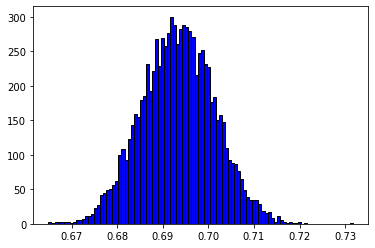

In [76]:
normal_distrib=np.random.normal(Hang_Seng["Yt"].mean(),Hang_Seng["Yt"].std(), 8690)
plt.hist(normal_distrib,color = 'blue', edgecolor = 'black', bins = 100)

In [81]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(Hang_Seng["Yt"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -30.803863
p-value: 0.000000


In [82]:
[scp.stats.skew(Hang_Seng["Yt"], bias=False),
scp.stats.kurtosis(Hang_Seng["Yt"], bias=False)]

[-1.6433970181677664, 42.49965162945181]

In [84]:
[scp.stats.skew(Hang_Seng["Yt"]),
scp.stats.kurtosis(Hang_Seng["Yt"])]

[-1.643113334193916, 42.47451200504221]

Предсказание тренда доходностей с помощью модели GARCH

In [109]:
import datetime as dt
import pandas_datareader.data as web
from arch import arch_model
returns = Hang_Seng['Yt'].pct_change().dropna()
res=[]
am = arch_model(returns,vol="EGARCH",p=2,q=5,rescale=False)
res = am.fit()

Iteration:      1,   Func. Count:     11,   Neg. LLF: -25030.431501674015
Iteration:      2,   Func. Count:     30,   Neg. LLF: -25031.027056218063
Iteration:      3,   Func. Count:     46,   Neg. LLF: -25567.29601657866
Iteration:      4,   Func. Count:     61,   Neg. LLF: -25584.104266991126
Iteration:      5,   Func. Count:     75,   Neg. LLF: -25584.537531753438
Iteration:      6,   Func. Count:     88,   Neg. LLF: -25596.01029365393
Iteration:      7,   Func. Count:    101,   Neg. LLF: -25604.85115479291
Iteration:      8,   Func. Count:    113,   Neg. LLF: -25616.30855998526
Iteration:      9,   Func. Count:    125,   Neg. LLF: -25620.394930542887
Iteration:     10,   Func. Count:    137,   Neg. LLF: -25623.816550528747
Iteration:     11,   Func. Count:    149,   Neg. LLF: -25625.706373580062
Iteration:     12,   Func. Count:    161,   Neg. LLF: -25628.334040866226
Iteration:     13,   Func. Count:    173,   Neg. LLF: -25628.56152550981
Iteration:     14,   Func. Count:    185,  